# 2과 과제
## 1번
### SMOTE와 ADASYN에서 k-neighbors를 조절하여 변화에 대해 논의하라.

- SMOTE : https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
- ADASYN : https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X, y = make_classification(n_classes=3, weights=[0.03, 0.07, 0.9], n_features=10,
                           n_clusters_per_class=1, n_samples=2000, random_state=10)

print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({2: 1795, 1: 141, 0: 64})


In [3]:
smote_class_0 = []
smote_class_1 = []
smote_class_2 = []

def smote_k(knum):
  sm = SMOTE(random_state=42, k_neighbors=knum)
  X_res, y_res = sm.fit_resample(X, y)
  y_res_sorted = sorted(Counter(y_res).items())
  smote_class_0.append(y_res_sorted[0][1])
  smote_class_1.append(y_res_sorted[1][1])
  smote_class_2.append(y_res_sorted[2][1])
  print('SMOTE k_neighbors = %s 일 때의 데이터 분포 : %s' % (knum, y_res_sorted))

In [4]:
for i in range(1, 11):
  smote_k(i)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

SMOTE k_neighbors = 1 일 때의 데이터 분포 : [(0, 1795), (1, 1795), (2, 1795)]
SMOTE k_neighbors = 2 일 때의 데이터 분포 : [(0, 1795), (1, 1795), (2, 1795)]
SMOTE k_neighbors = 3 일 때의 데이터 분포 : [(0, 1795), (1, 1795), (2, 1795)]
SMOTE k_neighbors = 4 일 때의 데이터 분포 : [(0, 1795), (1, 1795), (2, 1795)]
SMOTE k_neighbors = 5 일 때의 데이터 분포 : [(0, 1795), (1, 1795), (2, 1795)]
SMOTE k_neighbors = 6 일 때의 데이터 분포 : [(0, 1795), (1, 1795), (2, 1795)]
SMOTE k_neighbors = 7 일 때의 데이터 분포 : [(0, 1795), (1, 1795), (2, 1795)]
SMOTE k_neighbors = 8 일 때의 데이터 분포 : [(0, 1795), (1, 1795), (2, 1795)]
SMOTE k_neighbors = 9 일 때의 데이터 분포 : [(0, 1795), (1, 1795), (2, 1795)]
SMOTE k_neighbors = 10 일 때의 데이터 분포 : [(0, 1795), (1, 1795), (2, 1795)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

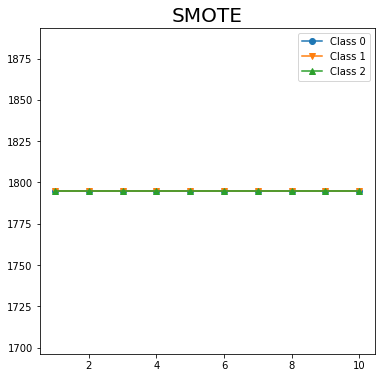

In [5]:
import matplotlib.pyplot as plt

x_axis = [i for i in range(1, 11)]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()

ax.plot(x_axis, smote_class_0, marker='o', label='Class 0')
ax.plot(x_axis, smote_class_1, marker='v', label='Class 1')
ax.plot(x_axis, smote_class_2, marker='^', label='Class 2')

ax.legend()

plt.title('SMOTE', fontsize=20)
plt.show()

In [6]:
adasyn_class_0 = []
adasyn_class_1 = []
adasyn_class_2 = []

def adasyn_k(knum):
  ada = ADASYN(random_state=0, n_neighbors=knum)
  X_syn, y_syn = ada.fit_resample(X, y)
  y_syn_sorted = sorted(Counter(y_syn).items())
  adasyn_class_0.append(y_syn_sorted[0][1])
  adasyn_class_1.append(y_syn_sorted[1][1])
  adasyn_class_2.append(y_syn_sorted[2][1])
  print('ADASYN n_neighbors = %s 일 때의 데이터 분포 : %s' % (knum, y_syn_sorted))

In [7]:
for i in range(1, 11):
  adasyn_k(i)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

ADASYN n_neighbors = 1 일 때의 데이터 분포 : [(0, 1800), (1, 1792), (2, 1795)]
ADASYN n_neighbors = 2 일 때의 데이터 분포 : [(0, 1792), (1, 1801), (2, 1795)]
ADASYN n_neighbors = 3 일 때의 데이터 분포 : [(0, 1796), (1, 1788), (2, 1795)]
ADASYN n_neighbors = 4 일 때의 데이터 분포 : [(0, 1796), (1, 1789), (2, 1795)]
ADASYN n_neighbors = 5 일 때의 데이터 분포 : [(0, 1795), (1, 1805), (2, 1795)]
ADASYN n_neighbors = 6 일 때의 데이터 분포 : [(0, 1804), (1, 1787), (2, 1795)]
ADASYN n_neighbors = 7 일 때의 데이터 분포 : [(0, 1788), (1, 1791), (2, 1795)]
ADASYN n_neighbors = 8 일 때의 데이터 분포 : [(0, 1790), (1, 1801), (2, 1795)]
ADASYN n_neighbors = 9 일 때의 데이터 분포 : [(0, 1804), (1, 1788), (2, 1795)]
ADASYN n_neighbors = 10 일 때의 데이터 분포 : [(0, 1806), (1, 1804), (2, 1795)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

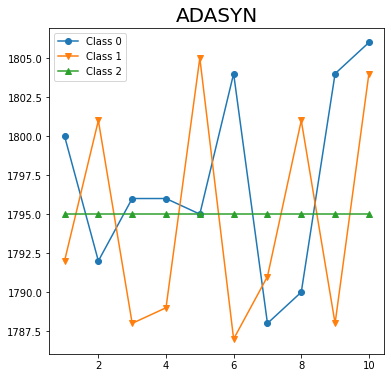

In [8]:
import matplotlib.pyplot as plt

x_axis = [i for i in range(1, 11)]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()

ax.plot(x_axis, adasyn_class_0, marker='o', label='Class 0')
ax.plot(x_axis, adasyn_class_1, marker='v', label='Class 1')
ax.plot(x_axis, adasyn_class_2, marker='^', label='Class 2')

ax.legend()

plt.title('ADASYN', fontsize=20)
plt.show()

## 2번
### 특성변수의 선택에서 교재에 있는 digit 데이터를 이용하여 목적변수가 분류일 때 chi2, f_classif, 그리고 mutual_info_classif를 적용한 결과를 비교하라.

- load_digits : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
- Load and return the digits dataset (classification).
- Each datapoint is a 8x8 image of a digit.
- Classes : 10
- Samples per class : ~180
- Samples Total : 1797
- Dimensionality : 64
- Features : integers 0-16

In [9]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

x, y = load_digits(return_X_y=True)
x.shape

(1797, 64)

In [10]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
y.shape

(1797,)

In [12]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
sb1 = SelectKBest(score_func=chi2, k=20)
x_new_1 = sb1.fit_transform(x, y)
x_new_1.shape

(1797, 20)

In [14]:
x_new_1

array([[ 1.,  0., 15., ...,  6.,  0.,  0.],
       [ 5.,  0.,  9., ...,  0., 10.,  0.],
       [12.,  0., 14., ...,  0., 16.,  9.],
       ...,
       [ 1.,  0.,  2., ...,  2.,  6.,  0.],
       [ 0.,  0., 15., ...,  5., 12.,  0.],
       [ 1.,  0.,  1., ...,  8., 12.,  1.]])

In [15]:
print(x_new_1[:3])

[[ 1.  0. 15.  2.  0. 11. 12.  0.  8.  5.  8.  4. 11.  0.  1.  7.  0.  6.
   0.  0.]
 [ 5.  0.  9. 15. 16.  6. 15. 16.  0.  0.  1.  0.  1. 16. 16.  0.  0.  0.
  10.  0.]
 [12.  0. 14. 13.  8. 16.  1. 15.  0.  1.  8.  9. 16. 16.  5.  0.  5.  0.
  16.  9.]]


In [16]:
sb2 = SelectKBest(score_func=f_classif, k=20)
x_new_2 = sb2.fit_transform(x, y)
x_new_2.shape

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(1797, 20)

In [17]:
x_new_2

array([[ 5., 13., 15., ...,  6., 10.,  0.],
       [ 0.,  0.,  9., ...,  0., 16., 10.],
       [ 0.,  3., 14., ...,  0., 11., 16.],
       ...,
       [ 1., 13.,  2., ...,  2., 13.,  6.],
       [ 2., 14., 15., ...,  5., 16., 12.],
       [10., 16.,  1., ...,  8., 14., 12.]])

In [18]:
print(x_new_2[:3])

[[ 5. 13. 15.  0. 11. 12.  0.  8.  5.  8.  0.  8. 11.  0.  1.  7.  0.  6.
  10.  0.]
 [ 0.  0.  9. 16.  6. 15. 16.  0.  0.  1. 16.  0.  1. 16. 16.  0.  0.  0.
  16. 10.]
 [ 0.  3. 14.  8. 16.  1. 15.  0.  1.  8. 15.  0. 16. 16.  5.  0.  5.  0.
  11. 16.]]


In [19]:
sb3 = SelectKBest(score_func=mutual_info_classif, k=20)
x_new_3 = sb3.fit_transform(x, y)
x_new_3.shape

(1797, 20)

In [20]:
x_new_3

array([[ 5., 13., 15., ...,  6., 10.,  0.],
       [ 0.,  0.,  9., ...,  0., 16., 10.],
       [ 0.,  3., 14., ...,  0., 11., 16.],
       ...,
       [ 1., 13.,  2., ...,  2., 13.,  6.],
       [ 2., 14., 15., ...,  5., 16., 12.],
       [10., 16.,  1., ...,  8., 14., 12.]])

In [21]:
print(x_new_3[:3])

[[ 5. 13. 15.  0. 11. 12.  0.  8.  5.  8.  0.  8. 11.  0.  1. 12.  0.  6.
  10.  0.]
 [ 0.  0.  9. 16.  6. 15. 16.  0.  0.  1. 16.  0.  1. 16. 16.  6.  0.  0.
  16. 10.]
 [ 0.  3. 14.  8. 16.  1. 15.  0.  1.  8. 15.  0. 16. 16.  5. 11.  5.  0.
  11. 16.]]
